# Findabetes model

* Dataset: CDC Diabetes Health Indicators

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)



{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [5]:
X.describe()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
X.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [7]:
y.isna().sum()

Diabetes_binary    0
dtype: int64

In [8]:
X.isna().sum()



HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Feature selection

**Features that are less relevant for a Swedish context**

* AnyHealthcare - in most Swedish regions, all patients listed at a primary health clinic will be covered by subsidised healthcare. This project will take placce in Stockholm, where you have to be folkbokförd to belong to a primary clinic[1], meaning all patients at the clinic are eligable for subsidised health care [2].
* NoDocbcCost - Same reasoning as above
* Income - may not be irrelevant, but would need to be adapted to a Swedish context. It is likely that the correlation between income level and diabetes risk is not the same in Sweden as in the United States. Since this dataset reflects U.S. income thresholds, the feature is not directly relevant for our population and should therefore be excluded unless it can be replaced with a more context-appropriate measure.
* Education - same reasoning as above.

**Features where the patient is unlikely to know the answer**
* HighChol - need access to lab results/knowledge about results.
* CholCheck - All patients may not be aware of whether or not their cholesterol has been tested or when it was done most recently.
* BMI - should not be excluded, but the patient may not be aware of their BMI, and it may be useful to add a bmi-calculator to the dashboard.


In [9]:
X = X.drop(columns=['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education', 'HighChol', 'CholCheck'])
X.head()

,HighBP,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1,40,1,0,0,0,0,1,0,5,18,15,1,0,9
1,0,25,1,0,0,1,0,0,0,3,0,0,0,0,7
2,1,28,0,0,0,0,1,0,0,5,30,30,1,0,9
3,1,27,0,0,0,1,1,1,0,2,0,0,0,0,11
4,1,24,0,0,0,1,1,1,0,2,3,0,0,0,11


# EDA

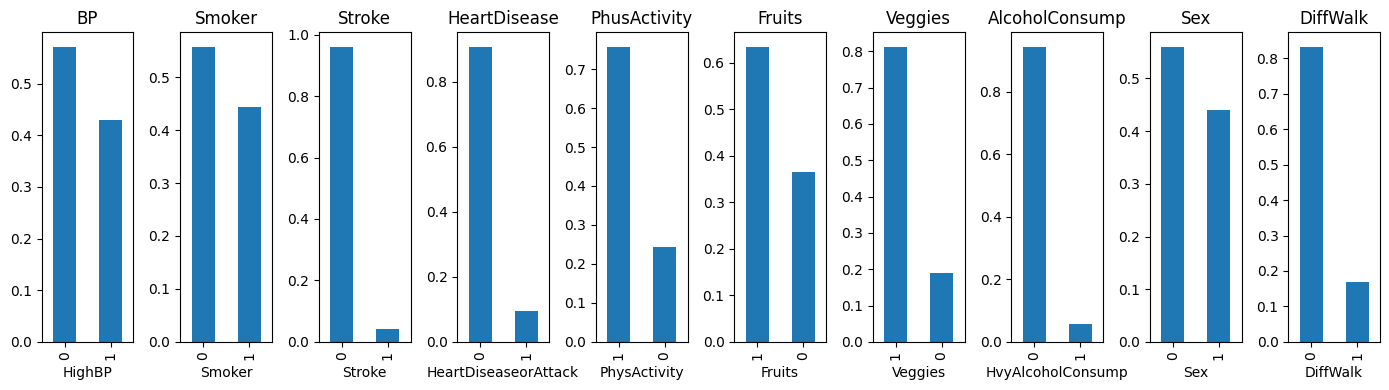

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 10, figsize=(14,4))

X["HighBP"].value_counts(normalize=True).plot(kind="bar", ax=ax1, title="BP")
X["Smoker"].value_counts(normalize=True).plot(kind="bar", ax=ax2, title="Smoker")
X['Stroke'].value_counts(normalize=True).plot(kind="bar", ax=ax3, title="Stroke")
X['HeartDiseaseorAttack'].value_counts(normalize=True).plot(kind="bar", ax=ax4, title="HeartDisease")
X['PhysActivity'].value_counts(normalize=True).plot(kind="bar", ax=ax5, title="PhusActivity")
X['Fruits'].value_counts(normalize=True).plot(kind="bar", ax=ax6, title="Fruits")
X['Veggies'].value_counts(normalize=True).plot(kind="bar", ax=ax7, title="Veggies")
X['HvyAlcoholConsump'].value_counts(normalize=True).plot(kind="bar", ax=ax8, title="AlcoholConsump")
X['Sex'].value_counts(normalize=True).plot(kind="bar", ax=ax9, title="Sex")
X['DiffWalk'].value_counts(normalize=True).plot(kind="bar", ax=ax10, title="DiffWalk")

plt.tight_layout()
plt.show()

In [11]:
pd.crosstab(X["PhysActivity"], X["DiffWalk"], normalize="index")

DiffWalk,0,1
PhysActivity,,
0,0.664832,0.335168
1,0.885499,0.114501


## Featues to consdier

**Fruits, Greens, PhysActivity**

The timing of data collection is not clearly specified. It is plausible that individuals who have lived with a diabetes diagnosis for some time may have already adjusted their diet and increased their consumption of fruits and vegetables. If so, this feature could misleadingly suggest a stronger association between green consumption and diabetes than what actually exists, thereby risking bias in the model.

**Difficilty walking**

Only 11% of those with difficulty walking are physically active. Maybe this feature does not add a lot of new info? The relevance it has on diabetes is probably linked to lower physical activity, which means it is covered by that feature anyway. Then again, it may contain people that have difficulty walking *because* of their diabetes, e.g., becuause of neuropathy, which means it may be a usesful indicator on its own. 

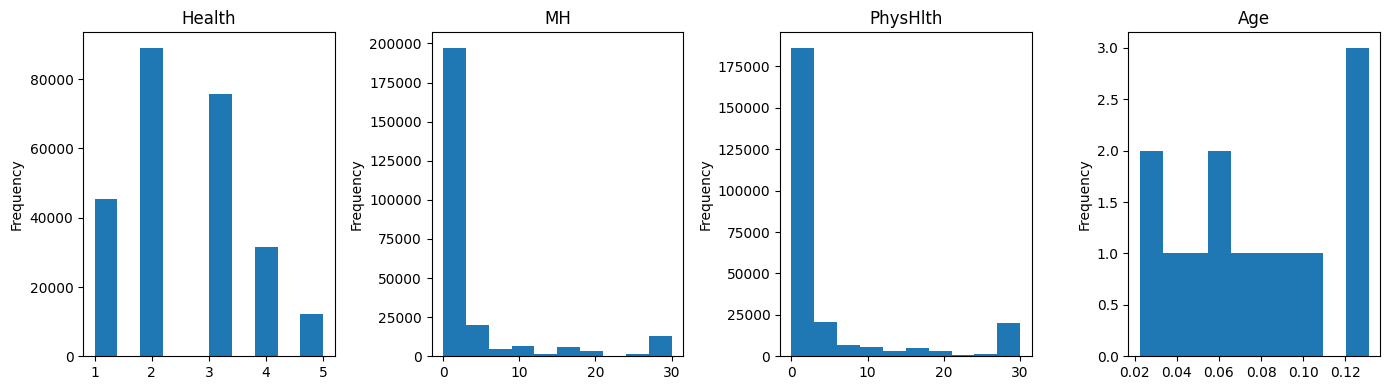

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14,4))

X["GenHlth"].plot(kind="hist", ax=ax1, title="Health")
X["MentHlth"].plot(kind="hist", ax=ax2, title="MH")
X['PhysHlth'].plot(kind="hist", ax=ax3, title="PhysHlth")
X['Age'].value_counts(normalize=True).plot(kind="hist", ax=ax4, title="Age")

plt.tight_layout()
plt.show()

<Axes: >

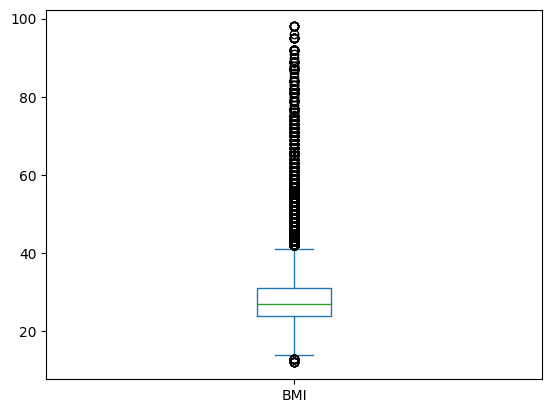

In [13]:
X['BMI'].plot(kind="box")

BMI contains a lot of extremely high outliers. Since these values increase in a continuous manner rather than appearing as obvious errors, they are retained in the dataset as it is hard to use the data to draw a clear line as to where these extreme values become unrealistic, and excluding them carries the risk of loosing clinically relevant data. 

In [14]:
df = X.copy()
df['target'] = y


corr = df.corr()
cols = ['target'] + [c for c in corr.columns if c != 'target']
corr = corr.loc[cols, cols]

fig = px.imshow(
    corr,
    text_auto=".2f",                 
    color_continuous_scale="RdBu",
    zmin=-1, zmax=1,
    aspect="auto",
)
fig.update_layout(
    title='Correlation matrix',
    xaxis_title='', yaxis_title='', coloraxis_colorbar_title='corr'
)
fig.update_xaxes(side='top', tickangle=-45)
fig.update_layout(width=800, height=800)
fig.show()

* Difficulties walking seem to be moderately assocatied with a poor general health.
* Poor physical health, poor mental health and poor general health all seem to have moderate correlation to eachother, the strongest association being poor physical health and poor general health.
* Physical activity seem to have a weak correlation to difficulty walking and poor physical health.
* General health has weak asociation woth physical activity. 

## Self reported health
The earlier correlation matrix indicated overlap between the self-reported health features. To assess whether they could be merged into a single feature, or if one or more could be removed, I plotted them side by side using boxplots for comparison. Since General Health is measured on a different scale (1–5) than Physical and Mental Health (0–30), I normalized all features to a 0–1 range to make their distributions directly comparable.

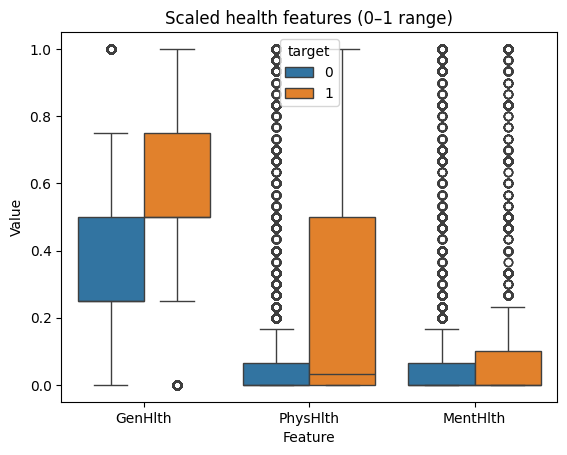

In [15]:
health_features = ["GenHlth", "PhysHlth", "MentHlth"]
df_scaled = df.copy()

scaler = MinMaxScaler()
df_scaled[health_features] = scaler.fit_transform(df_scaled[health_features])

df_melted = df_scaled.melt(id_vars="target", value_vars=health_features,
                           var_name="Feature", value_name="Value")

sns.boxplot(data=df_melted, x="Feature", y="Value", hue="target")
plt.title("Scaled health features (0–1 range)")
plt.show()

The distributions of Mental Health and Physical Health appear quite similar, and both are correlated with General Health. Moreover, the information captured by Physical Health may partly overlap with the Physical Activity variable, which could already account for limitations in daily functioning. Therefore, dropping Physical Health might simplify the model while retaining most of the relevant information, reducing redundancy between predictors.

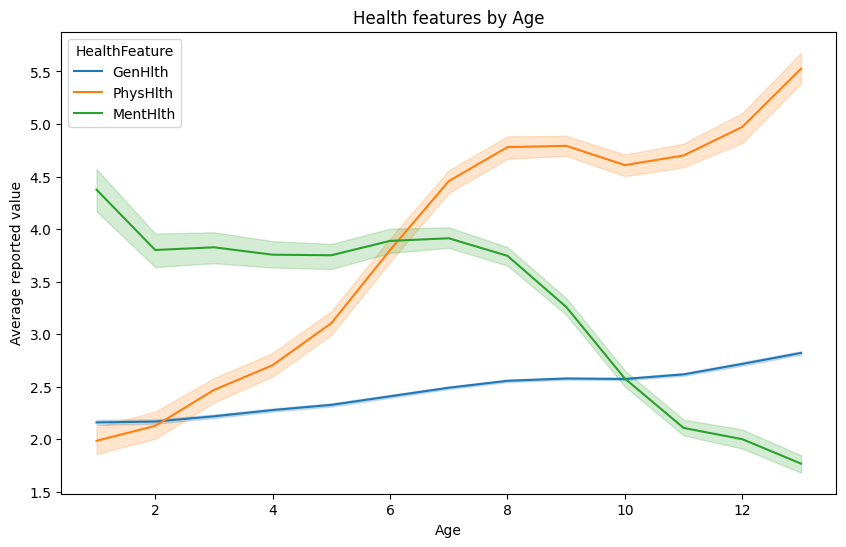

In [16]:
health_df = X[['Age', 'GenHlth', 'PhysHlth', 'MentHlth']].copy()
health_long = health_df.melt(id_vars="Age", 
                             value_vars=["GenHlth", "PhysHlth", "MentHlth"], 
                             var_name="HealthFeature", 
                             value_name="Score")


plt.figure(figsize=(10,6))
sns.lineplot(data=health_long, x="Age", y="Score", hue="HealthFeature", estimator="mean")
plt.title("Health features by Age")
plt.ylabel("Average reported value")
plt.show()


In [17]:
X= X.drop(columns=['target'])

KeyError: "['target'] not found in axis"

<Axes: title={'center': 'Diabetes'}, xlabel='Diabetes_binary'>

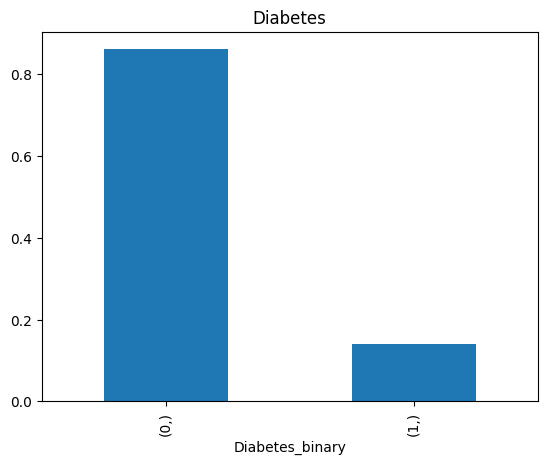

In [ ]:
y.value_counts(normalize=True).plot(kind="bar", title="Diabetes")

# Model

In [ ]:
X_ml = X.to_numpy()
y_ml = y.to_numpy().ravel()

In [ ]:
print(y_ml.shape)

(253680,)


Because of the large dataset I will start by training on a small subset (n=20 000). Based on the result I will move on with the best model and train on the whole dataset.

In [ ]:
X_small, _, y_small, _ = train_test_split(
    X_ml, y_ml, train_size=20000, stratify=y, random_state=42
)

pos = (y_small == 1).sum()
neg = (y_small == 0).sum()
scale_pos = (neg / pos) if pos else 1.0                
sw_balanced = compute_sample_weight("balanced", y_small)

models_and_grids = {
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42, class_weight="balanced"),
        {"clf__max_depth": [3, 5, 10]}
    ),
    "Random Forest": (
        RandomForestClassifier(n_jobs=-1, random_state=42, class_weight="balanced"),
        {"clf__n_estimators": [200, 500], "clf__max_depth": [5, 8]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {"clf__n_estimators": [100, 200], "clf__max_depth": [3, 5]}
    ),
    "HistGradientBoosting": (
        HistGradientBoostingClassifier(random_state=42),
        {"clf__max_depth": [3, 5]}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric="aucpr", random_state=42, n_jobs=-1, scale_pos_weight=scale_pos),
        {"clf__n_estimators": [100, 200], "clf__max_depth": [3, 5]}
    ),
    "SVM (linear)": (
        SVC(kernel="linear", probability=False, random_state=42, class_weight="balanced"),
        {"clf__C": [0.1, 1, 10]}
    ),
    "Logistic Regression": (
        LogisticRegression(max_iter=500, solver="liblinear", random_state=42, class_weight="balanced"),
        {"clf__C": [0.1, 1, 10]}
    ),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"pr_auc": "average_precision", "roc_auc": "roc_auc", "f1": "f1"}

results = []
for name, (clf, param_grid) in models_and_grids.items():
    pipe = Pipeline([("scaler", StandardScaler()), ("clf", clf)])
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring=scoring, refit='f1', n_jobs=-1)
    fit_params = {}
    if name in ['Gradient Boosting', 'HistGradientBoosting']:
        fit_params = {"clf__sample_weight": sw_balanced}

    grid.fit(X_small, y_small, **fit_params)
    results.append({
    "model": name,
    "best_parameters": grid.best_params_,
    "best_f1": grid.best_score_
})


results_df = pd.DataFrame(results)
results_df

,model,best_parameters,best_f1
0,Decision Tree,{'clf__max_depth': 5},0.412351
1,Random Forest,"{'clf__max_depth': 8, 'clf__n_estimators': 500}",0.439177
2,Gradient Boosting,"{'clf__max_depth': 5, 'clf__n_estimators': 100}",0.438586
3,HistGradientBoosting,{'clf__max_depth': 3},0.438833
4,XGBoost,"{'clf__max_depth': 3, 'clf__n_estimators': 100}",0.438824
5,SVM (linear),{'clf__C': 0.1},0.428503
6,Logistic Regression,{'clf__C': 0.1},0.438749


Random Forest performance:
Accuracy: 0.7136352885525071
Precision: 0.297326668115627
Recall: 0.7740840288583958
F1: 0.42963137439641974
ROC-AUC: 0.8129813555744385

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     43667
           1       0.30      0.77      0.43      7069

    accuracy                           0.71     50736
   macro avg       0.62      0.74      0.62     50736
weighted avg       0.86      0.71      0.76     50736



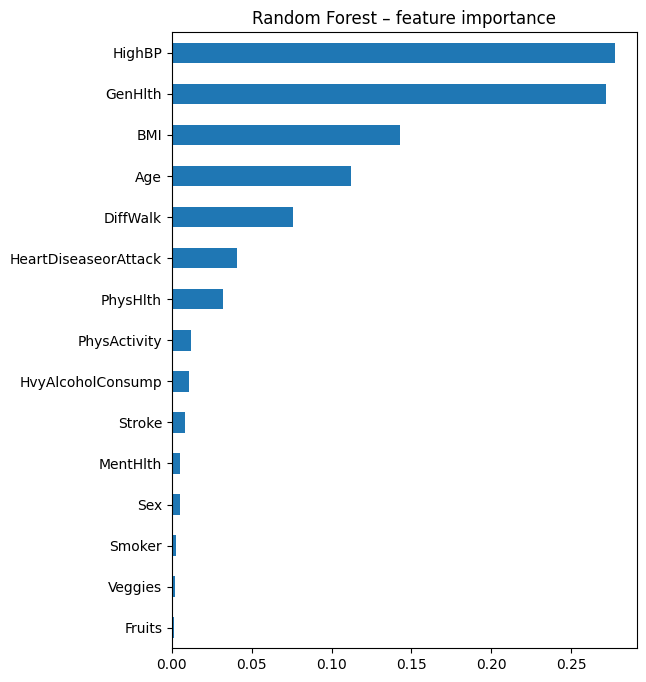


XGBoost performance:
Accuracy: 0.8637456638284453
Precision: 0.5419354838709678
Recall: 0.14259442636865186
F1: 0.2257811625041998
ROC-AUC: 0.8177483047012427

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.54      0.14      0.23      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736



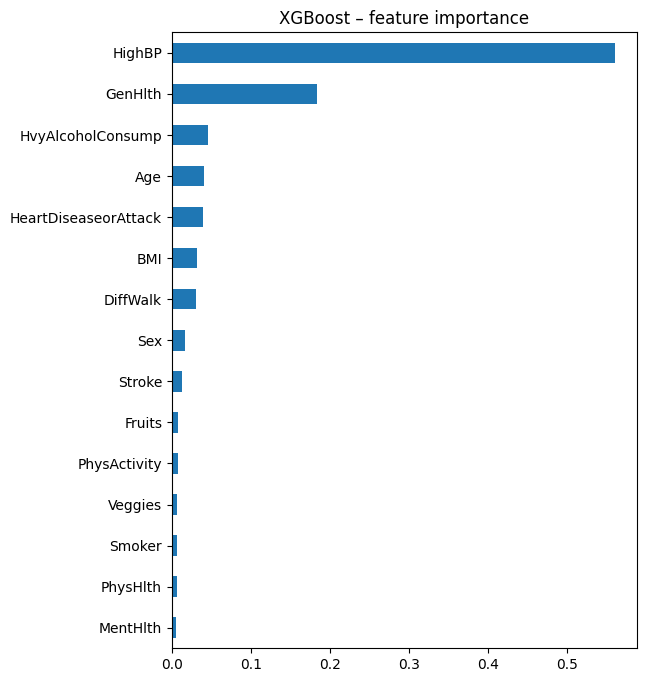

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_ml, y_ml, test_size=0.2, stratify=y, random_state=42)

# RF
rf = RandomForestClassifier(n_estimators=300, max_depth=8, n_jobs=-1, class_weight="balanced", random_state=42)
rf.fit(X_tr, y_tr)

rf_preds = rf.predict(X_val)
rf_probs = rf.predict_proba(X_val)[:, 1]  # för ROC-AUC

print("Random Forest performance:")
print("Accuracy:", accuracy_score(y_val, rf_preds))
print("Precision:", precision_score(y_val, rf_preds))
print("Recall:", recall_score(y_val, rf_preds))
print("F1:", f1_score(y_val, rf_preds))
print("ROC-AUC:", roc_auc_score(y_val, rf_probs))
print("\nClassification report:\n", classification_report(y_val, rf_preds))


rf_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
rf_imp.plot(kind="barh", figsize=(6,8))
plt.title("Random Forest – feature importance")
plt.show()

# XGBoost
xgb = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1,
                    eval_metric="aucpr", n_jobs=-1, random_state=42)
xgb.fit(X_tr, y_tr)

xgb_preds = xgb.predict(X_val)
xgb_probs = xgb.predict_proba(X_val)[:, 1]

print("\nXGBoost performance:")
print("Accuracy:", accuracy_score(y_val, xgb_preds))
print("Precision:", precision_score(y_val, xgb_preds))
print("Recall:", recall_score(y_val, xgb_preds))
print("F1:", f1_score(y_val, xgb_preds))
print("ROC-AUC:", roc_auc_score(y_val, xgb_probs))
print("\nClassification report:\n", classification_report(y_val, xgb_preds))

xgb_imp = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=True)
xgb_imp.plot(kind="barh", figsize=(6,8))
plt.title("XGBoost – feature importance")
plt.show()

# References

1. https://www.1177.se/Stockholm/sa-fungerar-varden/att-valja-vardmottagning/valja-vardmottagning/om-listning-och-avlistning/
2. https://www.informationsverige.se/sv/jag-har-fatt-uppehallstillstand/om-du-behover-vard.html/
